## Look at BLING output

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

In [3]:
# BLING:

folder_EPM101 = '/ocean/brogalla/GEOTRACES/BLING-EPM101/'
# folder_EPM102 = '/ocean/brogalla/ANHA4/BLING-EPM102/'

dset = xr.open_dataset(folder_EPM101+'ANHA4-EPM101_y2002m08d13_gridB.nc')
ANHA4_lons = dset['nav_lon'].values
ANHA4_lats = dset['nav_lat'].values
ANHA4_depths = dset['deptht'].values

file_range = ['ANHA4-EPM101_y2002m08d18_gridB.nc', 'ANHA4-EPM101_y2002m08d23_gridB.nc', 'ANHA4-EPM101_y2002m08d28_gridB.nc', \
              'ANHA4-EPM101_y2002m09d02_gridB.nc', 'ANHA4-EPM101_y2002m09d07_gridB.nc', 'ANHA4-EPM101_y2002m09d12_gridB.nc', \
              'ANHA4-EPM101_y2002m09d17_gridB.nc', 'ANHA4-EPM101_y2002m09d22_gridB.nc', 'ANHA4-EPM101_y2002m09d27_gridB.nc', \
              'ANHA4-EPM101_y2002m10d02_gridB.nc', 'ANHA4-EPM101_y2002m10d07_gridB.nc']

biomass_p = np.zeros((50,800,544))
zflux_pop = np.zeros((50,800,544))
for n,file in enumerate(file_range):
    dset = xr.open_dataset(folder_EPM101+file)
    biomass_p = biomass_p + dset['biomass_p'][0,:,:,:].drop(labels=['time_centered', 'time_counter']).values
    zflux_pop = zflux_pop + dset['jp_pop'] [0,:,:,:].drop(labels=['time_centered', 'time_counter']).values
    
biomass = biomass_p / n
zflux   = zflux_pop / n 

In [28]:
def plot_slicemap(variable, depth_slice, cmap=cmocean.cm.matter):
    fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj(ANHA4_lons, ANHA4_lats)

    cb = proj.contourf(x, y, variable[depth_slice,:,:], cmap=cmocean.cm.matter, vmin=0, vmax=1e-9, levels=20)
    
    cbaxes  = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 
    CBar    = plt.colorbar(cb , ax=ax, cax=cbaxes, format='%.2e') 
    CBar.ax.tick_params(axis='y', length=0, labelsize=6)
    CBar.set_label('Z flux', fontsize=7)
    
    return

In [36]:
print(zflux.shape)
print(np.nanmax(zflux[0,:,:]))
print(np.nanmax(zflux[10,:,:]))
print(np.nanmax(zflux[15,:,:]))
print(np.nanmax(zflux[20,:,:]))
print(np.nanmax(zflux[25,:,:]))
print(np.nanmax(zflux[30,:,:]))

(50, 800, 544)
1.2467018584150225e-09
2.106392571477045e-09
1.9920101901327313e-09
1.0049337084705457e-09
8.812026230249622e-12
2.0788148221055197e-14


In [37]:
print(zflux.shape)
print(np.nanmax(biomass[0,:,:]))
print(np.nanmax(biomass[10,:,:]))
print(np.nanmax(biomass[15,:,:]))
print(np.nanmax(biomass[20,:,:]))
print(np.nanmax(biomass[25,:,:]))
print(np.nanmax(biomass[30,:,:]))

(50, 800, 544)
0.0003457428130786866
0.0002974442613776773
0.00019944729137932882
6.389886002580169e-05
1.3741314246917824e-06
2.135148638051485e-08


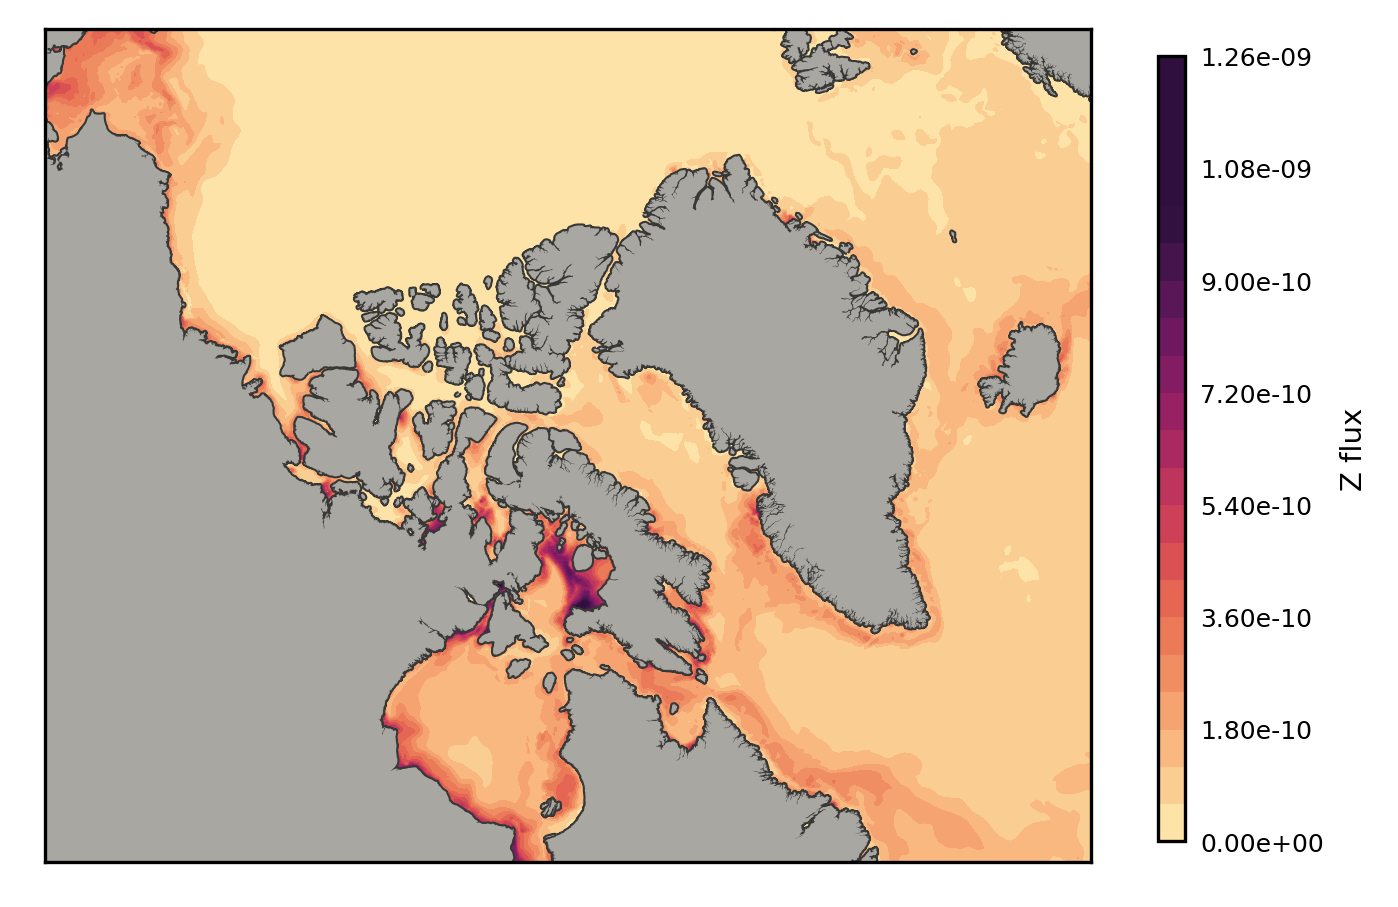

In [29]:
plot_slicemap(zflux, 0)

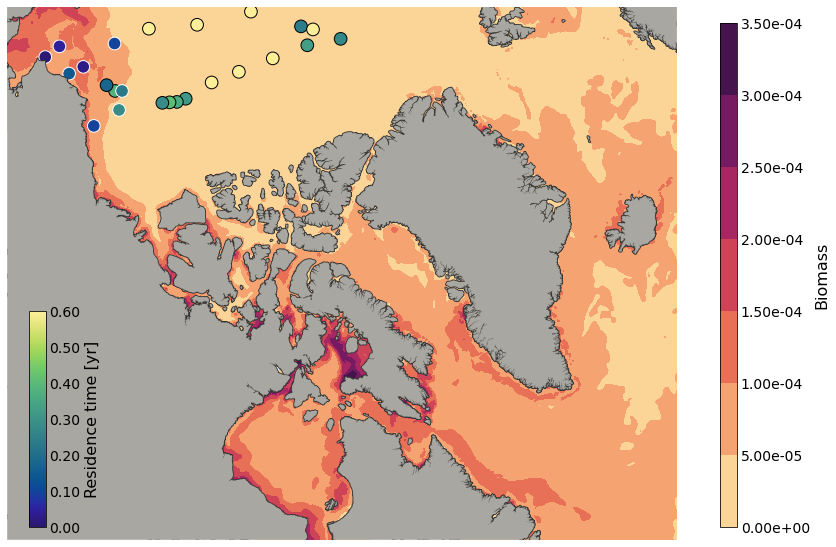

In [19]:
plot_slicemap(biomass, 0)

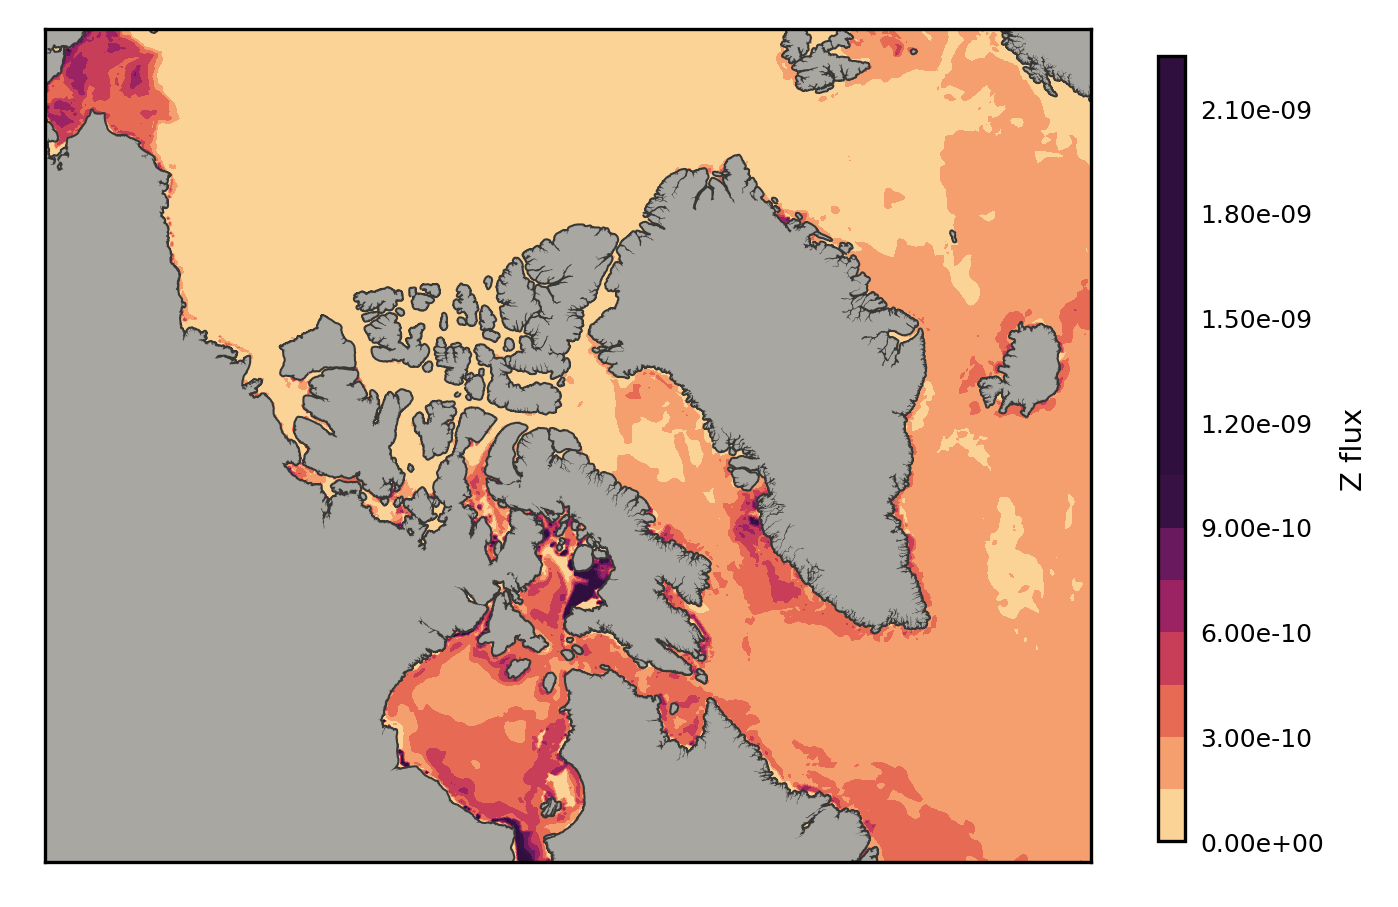

In [30]:
plot_slicemap(zflux, 10)

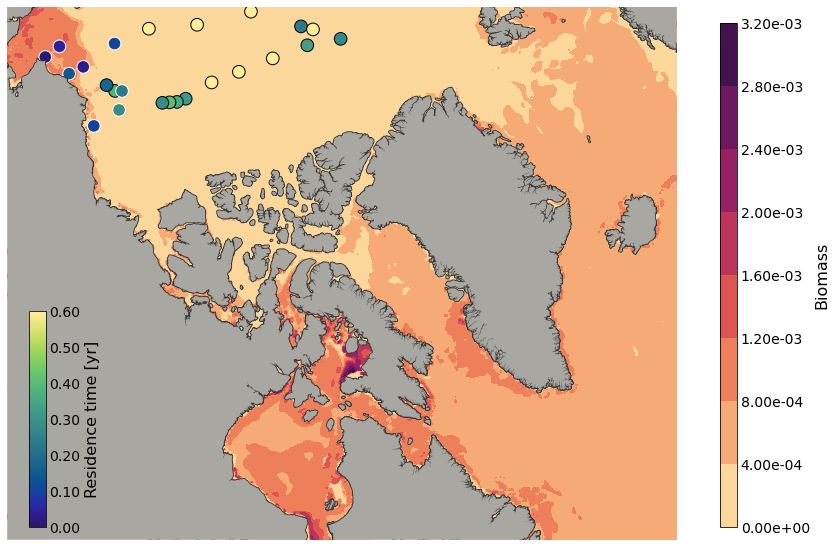

In [20]:
plot_slicemap(biomass_p, 10)

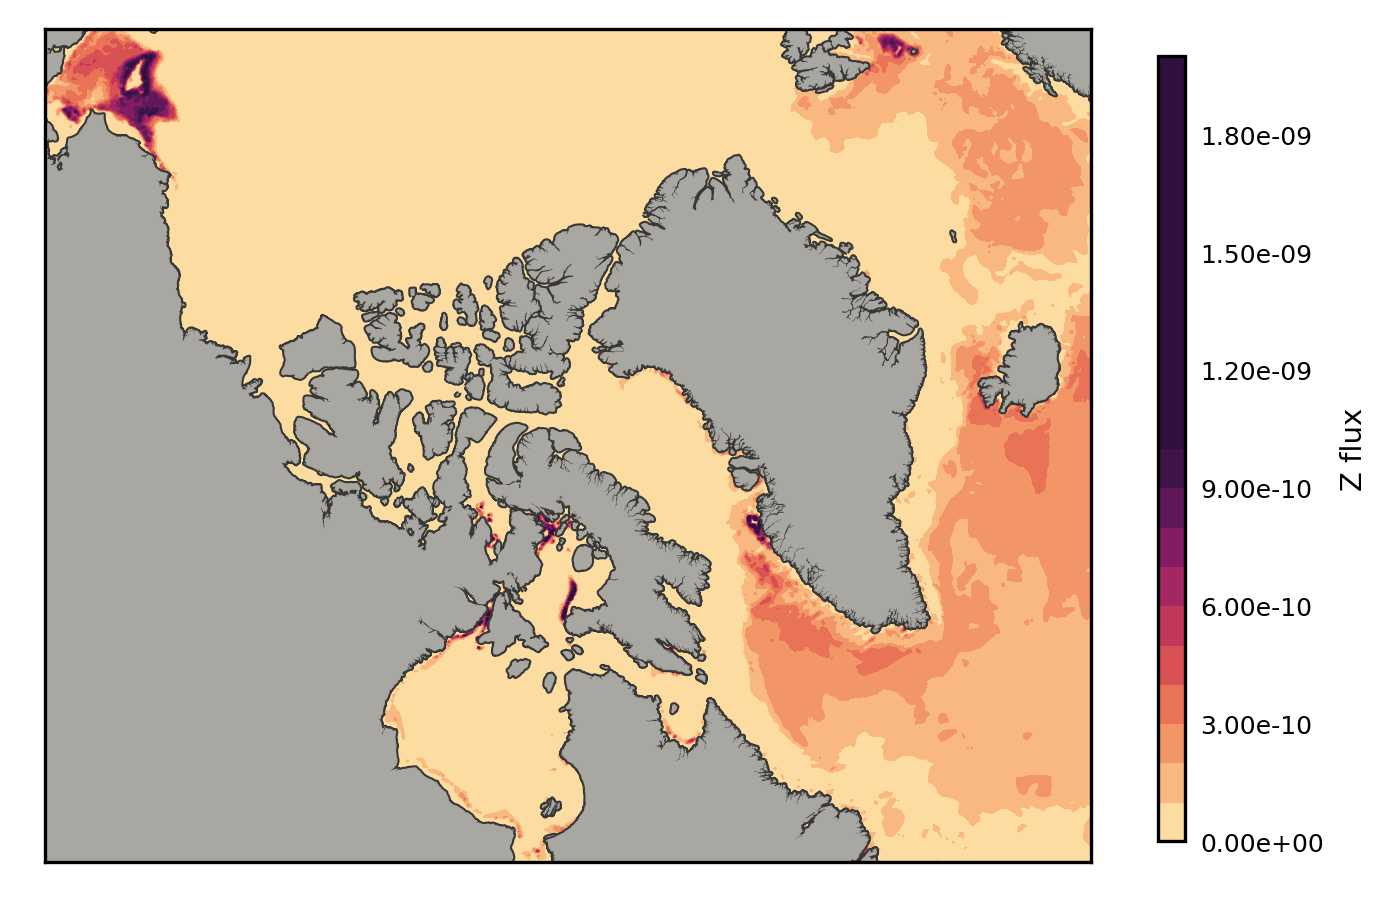

In [32]:
plot_slicemap(zflux, 15)

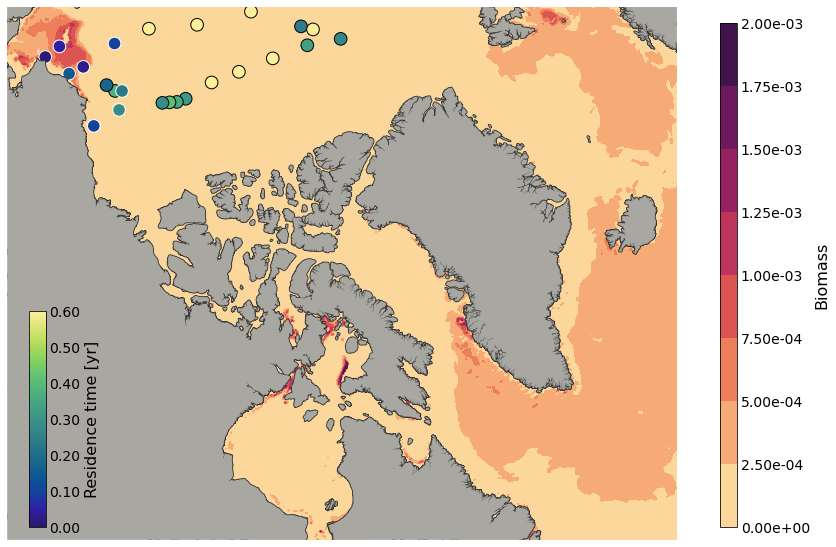

In [21]:
plot_slicemap(biomass_p, 15)

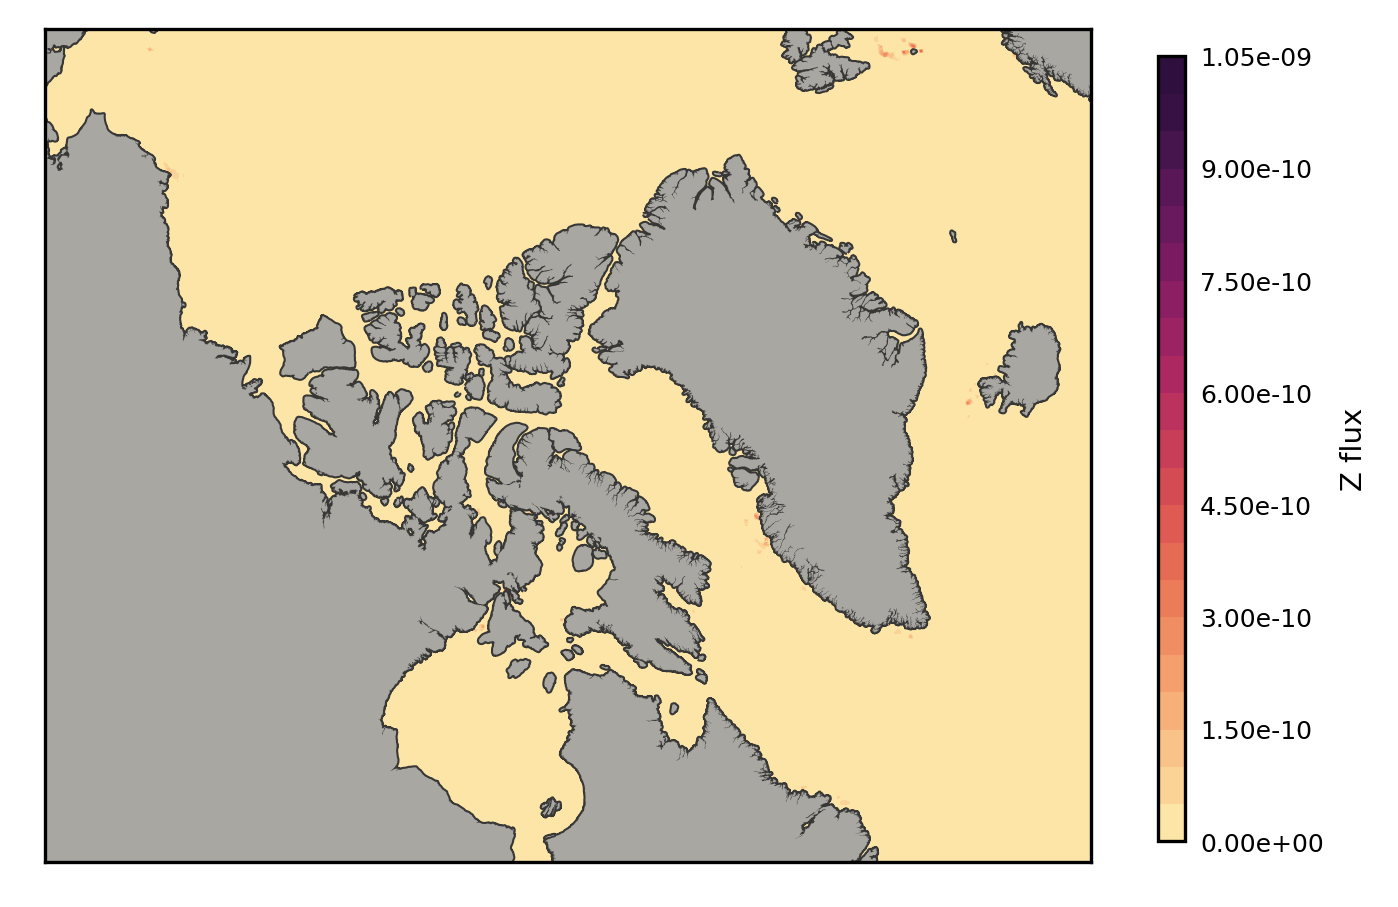

In [33]:
plot_slicemap(zflux, 20)

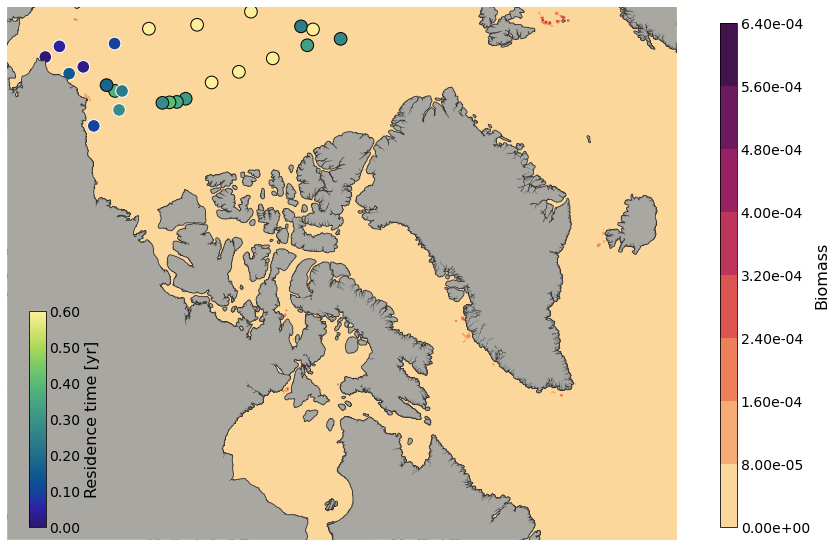

In [22]:
plot_slicemap(biomass_p, 20)